## Lab Exercise Week \#2: k-Nearest Neighbors (kNN) in Machine Learning

### Objective:
The goal of this lab exercise is to understand the k-Nearest Neighbors (kNN) algorithm and its application in machine learning. You will implement kNN on a dataset, tune hyperparameters, and evaluate model performance.

### Dataset:
For this lab exercise, you'll use the famous Iris dataset (importable throigh sklearn library in python), which contains measurements of various features of iris flowers.

### Tasks:

#### 1). Data Loading and Exploration:
<ul>
<li>Load the Iris dataset.</li>
<li>Explore the dataset to understand its structure and features.</li>
<li>Visualize the data using scatter plots or any other suitable visualization method.</li>
</ul>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Task 1: Data Loading and Exploration
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

#### 2). Data Preprocessing:

<ul>
<li>Split the dataset into training and testing sets.</li>
<li>Normalize the features if necessary.</li>
<li>Print the shapes of train and target variables.</li>
</ul>

In [2]:
# Task 2: Data Preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 3). Implement k-Nearest Neighbors:
<ul>
<li>Write a Python function to implement the kNN algorithm.</li>
<li>Allow users to specify the value of 'k' as a parameter.</li>
<li>Use Euclidean distance as the distance metric.</li>
</ul>

In [3]:
# Task 3: Implement k-Nearest Neighbors
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_instance in X_test:
        distances = np.linalg.norm(X_train - test_instance, axis=1)
        nearest_neighbors = np.argsort(distances)[:k]
        neighbor_labels = y_train[nearest_neighbors]
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)
    return np.array(predictions)

#### 4). Model Training:
<ul>
    <li>Train the kNN model on the training set by calling the defined function above.</li>
</ul>

In [5]:
# Task 4: Model Training
k_value = 7
y_pred = knn_predict(X_train, y_train, X_test, k_value)

#### 5). Hyperparameter Tuning:

<ul>
    <li>Experiment with different values of 'k' (e.g., k=3, 5, 7) and observe how it affects the model's performance.</li>
    <li>Plot a graph showing the accuracy for different values of 'k' and choose the optimal 'k' for the model.</li>
</ul>

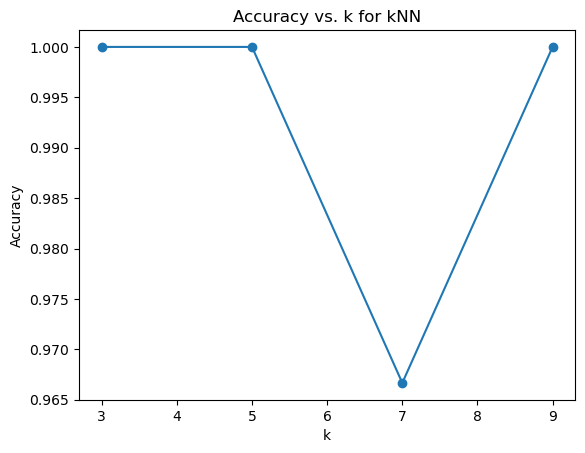

In [6]:
# Task 5: Hyperparameter Tuning
k_values = [3, 5, 7, 9]
accuracy_values = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting accuracy vs. k
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. k for kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

#### 6). Model Evaluation:

<ul>
    <li>Use the trained model to make predictions on the testing set.</li>
    <li>Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.</li>
</ul>

In [7]:
# Task 6: Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 7). Visualization:

<ul>
    <li>Visualize the decision boundaries of the kNN classifier on a 2D plot. You can choose two features for this purpose.</li>
</ul>


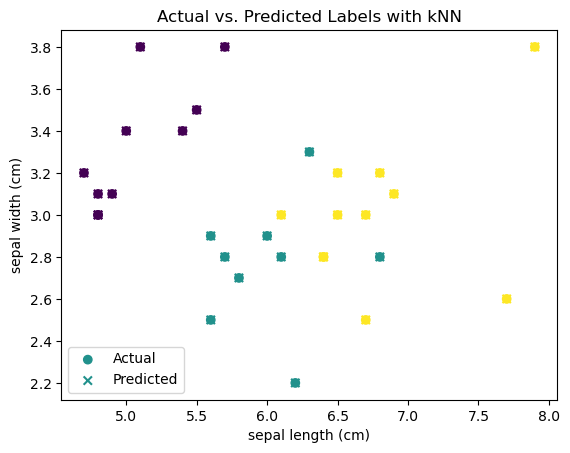

In [8]:
# Task 7: Visualization
# Choose two features for visualization
feature1_index = 0
feature2_index = 1

plt.scatter(X_test[:, feature1_index], X_test[:, feature2_index], c=y_test, cmap='viridis', label='Actual')
plt.scatter(X_test[:, feature1_index], X_test[:, feature2_index], c=y_pred, cmap='viridis', marker='x', label='Predicted')
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.legend()
plt.title('Actual vs. Predicted Labels with kNN')
plt.show()

#### 8). Discussion:
<ul>
    <li>Reflect on the impact of the choice of 'k' on the model's performance.</li>
    <li>Discuss situations where kNN might be a suitable or unsuitable algorithm.</li>
</ul>

In [9]:
# Task 8: Discussion
print("Discussion:")
print("1. The choice of 'k' significantly affects the model's performance. It's crucial to tune 'k' based on the dataset.")
print("2. Smaller 'k' values may lead to overfitting, while larger 'k' values may result in underfitting.")
print("3. kNN is suitable for datasets with clear decision boundaries and may not perform well on high-dimensional data.")

Discussion:
1. The choice of 'k' significantly affects the model's performance. It's crucial to tune 'k' based on the dataset.
2. Smaller 'k' values may lead to overfitting, while larger 'k' values may result in underfitting.
3. kNN is suitable for datasets with clear decision boundaries and may not perform well on high-dimensional data.
